# Определение параметров, влияющих на выполнение интернет-пользователями целевого действия при просмотре сайта 

                        Автор материала: Максим Сапрыкин
                        
План статьи
1. Введение и постановка задачи
2. Описание набора данных и признаков    
3. Первичный анализ данных (в том числе визуальный)
4. Найденные зависимости
5. Выбор метрики
6. Выбор модели
7. Предобработка данных
8. Кросс-валидация и настройка гиперпараметров модели 

# 1. Введение и постановка задачи

В течение последних двух десятилетий в мире и в частности в нашей стране гармонично развивались совершенно новые профессии, связанные с бурной информатизацией общества и распространением сети Интернет. В частности, появились специалисты, занимающиеся электронной комерцией, продажей и продвижением продуктов (товаров или услуг) в интернете - интернет-маркетологи (или иногда digital-маркетологи). 

В настоящее время для любого специалиста в области интернет-рекламы актуальна задача оптимизации своих рекламных кампании, ввиду постоянного роста конкуренции, а следовательно и стоимости рекламы. Такая задача обычно решается с помощью анализа статистической информации о посетителях интернет-площадки, на которой происходит как торговля продуктом (интернет-магазины), так и создание спроса на продукт и плавное подведение посетителя к его покупке (так называемые посадочные страницы - **[landing pages](https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BB%D0%B5%D0%B2%D0%B0%D1%8F_%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B8%D1%86%D0%B0)**)

Статистика обычно собирается с помощью двух наиболее популярных систем аналитики - Яндекс.Метрика или Google.Analytics. Затем специалист по интернет-рекламе проводит анализ данной статистики с целью поиска закономерностей, позволяющих скорректировать параметры рекламных кампаний таким образом, чтобы повысить их эффективность.

Вот пример из одного из моих реальных проектов:

<center>
<img src="img/1.jpg">

В данном случае в системе аналитики слева в столбце закодирована информация о таких настраиваемых параметрах рекламных кампаний, как формат банера, устройства для отображения, формат оплаты рекламы, дополнительные таргетинги интересов, возраст и пол посетителя. Такие комбинации параметров (а по сути на языке машинного обучения - это подпространства признаков) генерируются исключительно исходя из опыта того или иного специалиста. По приведенному выше скриншоту видно, что данный "срез" аналитики позволяет выявить различия в показателе качества рекламы ([конверсии](https://goo.gl/xwstfU)) в 4! раза для некоторых комбинаций параметров. Таким образом появляется возможность "отключить" неэффективные рекламыне кампании (комбинации параметров) и повысить общую эффективность рекламного проекта. 

Еще раз необходимо подчеркнуть, что эффективность анализа зависит только от профессионализма специалиста, способного подобрать весомые метрики и составить из них нужные комбинации.

Целью данного исследования является прикладное использование машинного обучения для **получения от обученной модели некоторого количества топ-признаков с их весами, которые могут быть легко интерпретированны, как настраиваемые параметры рекламных кампаний, вносящие наибольший вклад в достижение целевого действия на посещаемом сайте**. Таким образом, появляется идея уменьшить зависимоть эффективности анализа от профессионализма человека и переложить эту задачу на "плечи" математической модели.

# 2. Описание набора данных и признаков

<center>
<img src="img/2.jpg">

Мы будем работать с одним из моих реальных проектов. Я сотрудничаю с компанией, которая занимается установкой натяжных потолков в Москве и области. В течение 1,5 месяцев в начале 2018 года мы плотно тестировали один из наших рекламных сайтов в системе таргетированной рекламы myTarget. Было получено около 3200 переходов на сайт и посетители отправили с сайта около 100 заявок на замер. На этом, хоть и небольшом, количестве данных будем пытаться получить приемлимые результаты.

Сбор данных проводился с помощью описанной в предыдущем параграфе системы аналитики Яндекс.Метрика. Для этого в системе аналитики были построены отчеты и выгружены в формате xls. Каждая строка соответствует посещению сайта одним уникальным посестителем. По столбцам таблицы расположены аналитические метрики, в языке машинного обучения - это и есть признаки, которые мы будем использовать для обучения модели. 

Подробное описание решаемой задачи уже приведено во вступительной части статьи - в пункте 1. Давайте перейдем к описанию признаков.

**Целевой признак** - выполнение определенного действия посетителем на сайте. В нашем конкретном случае это - ввод в форму на сайте номера телефона посетителя и нажатие кнопки "Отправить". Отсюда следует, что **целевой признак - бинарный, а значит решаться будет задача бинарной классификации**. Целевой признак в таблице назвается **Достижение цели**

Теперь опишем признаки, на которых будет обучаться наша модель. Для начала ограничимся признаками, которые можно "вытащить" из системы аналитики. А уже потом будет генерировать свои "мощные" фичи:

**Дата и время визита** - время начала сессии, из которого мы потом будем генерировать новые признаки

**Возраст** - возраст посетителя сайта (пол мы не учитываем, потому что изначально реклама настраивалась только на женщин и все посетители за исключением некоторой погрешности - женщины)

**Объявление** - номер рекламного объявления в системе myTarget

**Сегмент** - заведомо мощный признак, полученный экспертной оценкой, по поторому можно хорошо классифицировать модель. Что это такое и влияние этого признака описано в п.1, он нам нужен, чтобы впринципе оценить всю затею. Если с данным признаком модель будет выдавать ерунду, то значит мы что-то явно делаем не так. В дальнейшем мы его уберём из датасета

**Визиты** - сколько всего раз этот пользователь заходил на сайт в течение сессии

**Поддержка сookies** - поддержка сookies устройством пользователя

**Поддержка Java** - поддержка Java устройством пользователя

**Поддержка JavaScript** - поддержка JavaScript устройством пользователя

**Поддержка Flash** - поддержка Flash устройством пользователя

**Поддержка Silverlight** - поддержка Silverlight устройством пользователя

**Мобильность** - мобильное устройство или нет

**Блокировка рекламы** - установлен ли блокировщик рекламы

**Глубина просмотра** - кол-во страниц, просмотренных посетителем

**Время на сайте** - время, которое посетитель провел на сайте

**Отказность** - Отказ означает, что посетитель провел на сайте менее 15 секунд

**Является ли визит первым визитом посетителя** -  название говорит само за себя

**Визитов в истории** - сколько всего раз этот пользователь заходил на сайт за всю историю

**Дней от первого визита** - сколько прошло дней от первого визита

**Тип устройства** - какой тип у устройства пользователя

**Группа операционных систем** - какая группа операционных систем

**Операционная система (детально)** - какая именно операционная система у пользователя

**Браузер** - какой именно браузер

Как видно, часть признаков - бинарные, часть - категориальные, но всех их еще надо будет привести к подобающему виду.

А пока загрузим все необходимые нам библиотеки и сформируем DataFrame из полученного файла и посмотрим на его структуру и наполнение

In [174]:
from pandas import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# игнорируем warnings
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (28, 15), 
        "axes.titlesize" : 18 
    }
)

from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [387]:
df = pd.read_excel('data/data.xlsx')

Всего как мы видим 3151 строка и 23 признака, влючая целевой

In [136]:
df.shape

(3151, 23)

In [137]:
df.head()

,Дата и время визита,Возраст,Объявление,Сегмент,Визиты,Достижение цели,Поддержка сookies,Поддержка Java,Поддержка JavaScript,Поддержка Flash,...,Глубина просмотра,Время на сайте,Отказность,Является ли визит первым визитом посетителя,Визитов в истории,Дней от первого визита,Тип устройства,Группа операционных систем,Операционная система (детально),Браузер
0,2018-01-13 00:38:29,48,28728144,90x75_cpc_remont_F45-50,1.0,0,1.0,0.0,1.0,0.0,...,2-3,30 – 59 секунд,Не отказ,Вернувшиеся посетители,4-7,2‑3 дня,ПК,Windows,Windows 10,Opera
1,2018-01-13 09:47:55,57,28728201,90x75_cpc_remont_F55-60,1.0,0,0.0,0.0,1.0,0.0,...,1,0 секунд (отказ),Отказ,Новые посетители,1,0 дней,ПК,Windows,Windows 7 или 2008 Server,Firefox
2,2018-01-13 14:14:08,48,28728144,90x75_cpc_remont_F45-50,1.0,0,0.0,0.0,1.0,0.0,...,1,10 – 29 секунд,Не отказ,Вернувшиеся посетители,8-15,2‑3 дня,ПК,Windows,Windows 10,Opera
3,2018-01-14 16:34:35,59,28728201,90x75_cpc_remont_F55-60,1.0,0,0.0,0.0,1.0,0.0,...,1,0 секунд (отказ),Отказ,Вернувшиеся посетители,2-3,2‑3 дня,ПК,Windows,Windows 8.1,Firefox
4,2018-01-15 09:30:56,50,28728192,90x75_cpc_remont_F50-55,1.0,0,1.0,0.0,1.0,1.0,...,1,0 секунд (отказ),Отказ,Новые посетители,1,0 дней,ПК,Windows,Windows XP,Firefox


Из описания датафрейма ниже видно, что есть пара пропусков, которые обусловленны просто отсутствием в системе аналитики части данных по 2м визитам. Это впринципе не страшно и скорее всего это может говорить о какой-то ошибки на этапе сбора данных или формирования промежуточного отчёта. **Поэтому во время предобработки мы эти две строки из датасета удалим.**

Также видно, что у нас достаточно много категориальных признаков, из которых мы сможем построить в перспективе еще несколько бинарных признаков с помощью OneHotEncoder

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3151 entries, 0 to 3150
Data columns (total 23 columns):
Дата и время визита                            3151 non-null object
Возраст                                        3151 non-null int64
Объявление                                     3151 non-null int64
Сегмент                                        3151 non-null object
Визиты                                         3149 non-null float64
Достижение цели                                3151 non-null int64
Поддержка сookies                              3149 non-null float64
Поддержка Java                                 3149 non-null float64
Поддержка JavaScript                           3149 non-null float64
Поддержка Flash                                3149 non-null float64
Поддержка Silverlight                          3149 non-null float64
Мобильность                                    3149 non-null float64
Блокировка рекламы                             3149 non-null float64
Глуб

# 3. Первичный анализ данных (в том числе визуальный)


### Целевой признак
Начнём с изучения распределения целевого признака. Уже исходя из описания задачи понятно, что **выборка будет несбалансированная**. Не может быть такого, чтобы половина посетителей оставляла заявки, а половина нет. Процент конверсии (отношение кол-ва посетителей, достигших цели, к общему кол-ву посетителей за выбранный период времени) в среднем по больнице обычно составляет 3-8%. При таких показателях обычно считается, что можно работать.

Посмотрим на фактическое распределение целевого признака:

In [8]:
df['Достижение цели'].value_counts()

0    3064
1      87
Name: Достижение цели, dtype: int64

В нашем случае конверсия сайта проходит как раз по нижней условной границе. Работать можно, но крайне желательно конверсию поднять. Чем мы и занимаемся

In [11]:
counts = df['Достижение цели'].value_counts()
print("Конверсия сайта: {}%".format(round(counts[1]/counts[0], 3) * 100))

Конверсия сайта: 2.8000000000000003%


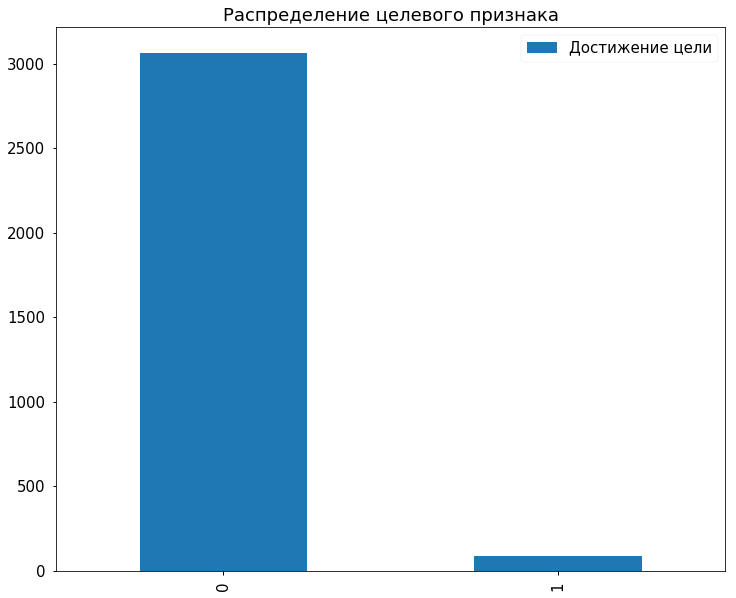

In [12]:
rcParams['figure.figsize'] = 12, 10
counts.plot(kind='bar');
plt.legend();
plt.title('Распределение целевого признака');

### Сегмент
Посмотрим, как влияют раличные признаки на целевой. Начнём с заведомо "мощного" признака - сегмент. И, к счастью, ничего удивительно, кроме пяти сегментов почти без данных и четырёх с малым количеством данных - посмотрим потом, как модель будет реагировать на этот признак

In [13]:
pd.crosstab(df['Достижение цели'], df['Сегмент'], margins=True)

Сегмент,90x75_cpc_remont_F40-45,90x75_cpc_remont_F45-50,90x75_cpc_remont_F50-55,90x75_cpc_remont_F55-60,90x75_cpc_wide_F30-40,90x75_cpc_wide_F40-50,90x75_cpm_remont_F40-45,90x75_cpm_remont_F45-50,native_desktop_cpc_remont_F40-45,native_desktop_cpc_remont_F45-50,native_desktop_cpc_remont_F50-55,native_mobile_cpc_remont_F40-45,native_mobile_cpc_remont_F45-50,native_mobile_cpc_remont_F50-55,native_mobile_cpc_remont_F55-60,native_mobile_cpm_remont_F40-45,native_mobile_cpm_remont_F50-55,All
Достижение цели,,,,,,,,,,,,,,,,,,
0,209,166,178,185,1,3,5,1,30,38,32,600,497,649,442,4,24,3064
1,6,1,7,4,0,0,0,0,1,0,0,27,13,21,7,0,0,87
All,215,167,185,189,1,3,5,1,31,38,32,627,510,670,449,4,24,3151


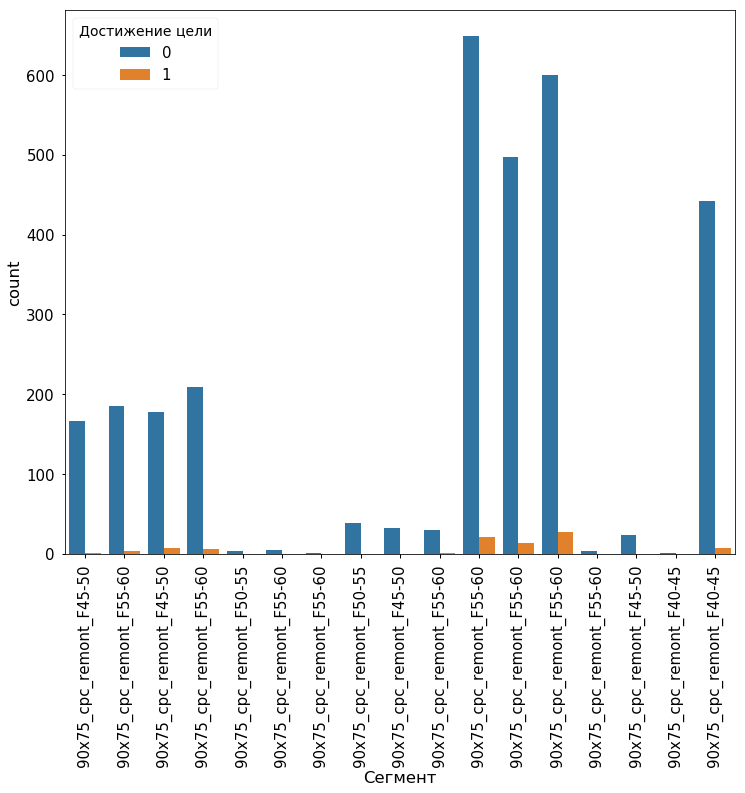

In [14]:
rcParams['figure.figsize'] = 12, 10
p = sns.countplot(x='Сегмент', hue='Достижение цели', data=df);
p.set_xticklabels(labels = df['Сегмент'], rotation=90);

### Мобильность устройства
Теперь посмотрим, как влияет мобильность устройства на целевой признак. А тут уже достаточно интересно. Мы видим 5 аномальных значений, которые делают бинарный признак по сути категориальным. По идее, устройство может быть либо мобильным, либо нет. А у нас в табилце появляется некое значение 0.5! OMG! Устройство Шрёдингера????!!! 

In [15]:
mob_tab = pd.crosstab(df['Достижение цели'], df['Мобильность'], margins=True)
mob_tab

Мобильность,0.0,0.5,1.0,All
Достижение цели,,,,
0,849,5,2208,3062
1,18,0,69,87
All,867,5,2277,3149


Давайте посмотрим в датасете на строки, которые соответсвуют этому аномальному значению 0.5

In [16]:
df[df['Мобильность'] == 0.5]

,Дата и время визита,Возраст,Объявление,Сегмент,Визиты,Достижение цели,Поддержка сookies,Поддержка Java,Поддержка JavaScript,Поддержка Flash,...,Глубина просмотра,Время на сайте,Отказность,Является ли визит первым визитом посетителя,Визитов в истории,Дней от первого визита,Тип устройства,Группа операционных систем,Операционная система (детально),Браузер
583,2018-01-23 10:57:35,57,29071641,90x75_cpc_remont_F55-60,2.0,0,0.0,0.0,1.0,0.0,...,1,0 секунд (отказ),Отказ,Новые посетители,1,0 дней,ПК,Windows,Windows 7 или 2008 Server,Opera
751,2018-01-25 09:26:04,41,29100965,native_mobile_cpc_remont_F40-45,2.0,0,0.5,0.0,1.0,0.5,...,1,0 секунд (отказ),Отказ,Новые посетители,1,0 дней,ПК,Windows,Windows 7 или 2008 Server,Opera
752,2018-01-25 09:26:04,52,29072167,native_desktop_cpc_remont_F50-55,2.0,0,0.5,0.0,1.0,0.5,...,1,0 секунд (отказ),Отказ,Новые посетители,1,0 дней,ПК,Windows,Windows 7 или 2008 Server,Opera
2099,2018-02-21 10:20:36,43,29270212,native_mobile_cpc_remont_F40-45,2.0,0,0.0,0.5,1.0,0.0,...,1,0 секунд (отказ),Отказ,Вернувшиеся посетители,2-3,4‑7 дней,ПК,Windows,Windows 2003 Server или XP Pro x64,Google Chrome
2100,2018-02-21 10:20:36,53,29270215,native_mobile_cpc_remont_F50-55,2.0,0,0.0,0.5,1.0,0.0,...,1,0 секунд (отказ),Отказ,Вернувшиеся посетители,2-3,4‑7 дней,ПК,Windows,Windows 2003 Server или XP Pro x64,Google Chrome


Ну тут уже все становится понятно. Обратим внимание на столбец Визиты. В рамках одной сесссии, посетитель захоил с разных устройств. Одно было мобильным, а другое десктопом. Отсюда и возникает путаница. 

По идее, было бы круто, если бы объекты со значением признака мобильности 0.5 имели принадлежность к искомому классу целевого признака. Тогда бы мы действительно стали использовать этот признак как весомый категориальный. Но нет. А вот напротив, мы видим, что как бинарный признак, он очень хорошо нам подходит.  Давайте посмотрим на конверсию сайта отдельно для мобильных и не мобильных устройств

In [17]:
conv_desctop = round(mob_tab[0][1]/mob_tab[0]['All'],4)*100
conv_mob = round(mob_tab[1][1]/mob_tab[1]['All'],4)*100

print('немобильное устройство: {}%\nмобильное устройство: {}%'.format(conv_desctop, conv_mob))

немобильное устройство: 2.08%
мобильное устройство: 3.0300000000000002%


** Посетители с мобильных устройств в 1,5 чаще оставляют заявки на сайте! Запомним это. **

### Тип устройства

А что если посмотреть еще подробнее - не просто мобильные и не мобильные, а детальнее: ПК, Планшеты и Смартфоны. 

In [18]:
tab = pd.crosstab(df['Достижение цели'], df['Тип устройства'], margins=True)
tab

Тип устройства,ПК,Планшеты,Смартфоны,All
Достижение цели,,,,
0,854,282,1926,3062
1,18,8,61,87
All,872,290,1987,3149


In [19]:
conv_pk = round(tab['ПК'][1]/tab['ПК']['All'],4)*100
conv_tablet = round(tab['Планшеты'][1]/tab['Планшеты']['All'],4)*100
conv_phone = round(tab['Смартфоны'][1]/tab['Смартфоны']['All'],4)*100

print('ПК: {}%\nПланшет: {}%\nСмартфон: {}%'.format(conv_pk, conv_tablet, conv_phone))

ПК: 2.06%
Планшет: 2.76%
Смартфон: 3.0700000000000003%


Видим, что посетители со смартфонов немного качественнее в смысле достижения целей. Это тоже важно, хотя вцелом конверсия не сильно повысилась

### Отказность

In [20]:
tab = pd.crosstab(df['Достижение цели'], df['Отказность'], margins=True)
tab

Отказность,Не отказ,Отказ,All
Достижение цели,,,
0,2300,762,3062
1,87,0,87
All,2387,762,3149


Вообще говоря, это очевиднейшая вещь - логично предположить, что посетители, которые провели на сайте менее 15 секунд просто не успеют изучить сайт и принять решение о том, чтобы выполнить на сайте какое-то действие. Но тут нам важны цифры. Оказывается мы просто теряем четверть посетителей. из 3000 человек около 750 просто закрыли сайт сразу. Это очень важный показатель качества самой страницы и **это сигнал о том, что нужно работать над сайтом! Но это никак не настраиваемый параметр рекламной кампании, при этом заведомо сильный признак, поэтому его надо удалить из датасета**

### Глубина просмотра.

In [389]:
deep_view_tab = pd.crosstab(df['Достижение цели'], df['Глубина просмотра'], margins=True)
deep_view_tab

Глубина просмотра,1,2-3,4-7,8-15,All
Достижение цели,,,,,
0,2786,258,17,1,3062
1,2,70,15,0,87
All,2788,328,32,1,3149


### Операционные системы и браузеры

А вот тут похоже у нас будет инсайт! Предпосылок для выделения этих признаков в "мощные" вроде бы никаких нет. Ну разве что можно сделать предположение о том, что  пользователи iOS вероятно более состоятельные, чем пользователи Android. Давайте посмотрим на наши кросстабы и посчитаем конверсию.

In [21]:
os_group_tab = pd.crosstab(df['Достижение цели'], df['Группа операционных систем'], margins=True)
os_group_tab

Группа операционных систем,BlackBerry OS,GNU/Linux,Google Android,Mac OS,Windows,iOS,All
Достижение цели,,,,,,,
0,1,8,1888,10,856,299,3062
1,0,1,59,0,18,9,87
All,1,9,1947,10,874,308,3149


In [22]:
os_dict = {}
for os in list(os_group_tab.columns.values):
    conv = round(os_group_tab[os][1]/os_group_tab[os]['All'],4)*100
    os_dict[conv] = os

for conv in sorted(os_dict.keys(), reverse=True):
    if(os_dict[conv] != 'All'):
        print('{}: {}%'.format(os_dict[conv], conv))

GNU/Linux: 11.110000000000001%
Google Android: 3.0300000000000002%
iOS: 2.92%
Windows: 2.06%
Mac OS: 0.0%


In [23]:
browser_tab = pd.crosstab(df['Достижение цели'], df['Браузер'], margins=True)
browser_tab

Браузер,Amigo,Android Browser,BlackBerry,Chrome Mobile,Chromium,Edge,Firefox,Firefox Mobile,Google Chrome,Google: мобильное приложение,...,PaleMoon,Puffin,Safari,Samsung Internet,UCWEB,Интернет@Mail.ru,Яндекс.Браузер,Яндекс.Браузер lite,Яндекс: мобильное приложение,All
Достижение цели,,,,,,,,,,,,,,,,,,,,,
0,13,226,1,1020,2,30,131,2,418,4,...,1,4,7,208,45,4,332,5,67,3062
1,0,12,0,30,0,0,3,1,10,0,...,0,1,0,1,1,0,13,0,2,87
All,13,238,1,1050,2,30,134,3,428,4,...,1,5,7,209,46,4,345,5,69,3149


In [24]:
browser_dict = {}
for br in list(browser_tab.columns.values):
    conv = round(browser_tab[br][1]/browser_tab[br]['All'],4)*100
    browser_dict[conv] = br
    
for conv in sorted(browser_dict.keys(), reverse=True):
    if(browser_dict[conv] != 'All'):
        print('{}: {}%'.format(browser_dict[conv], conv))    

Firefox Mobile: 33.33%
Puffin: 20.0%
Android Browser: 5.04%
Opera Mobile: 4.0%
Яндекс.Браузер: 3.7699999999999996%
Opera: 3.51%
Яндекс: мобильное приложение: 2.9000000000000004%
Chrome Mobile: 2.86%
Mobile Safari: 2.75%
Google Chrome: 2.34%
Firefox: 2.2399999999999998%
UCWEB: 2.17%
MIUI: 1.3%
MSIE: 1.15%
Samsung Internet: 0.48%
Яндекс.Браузер lite: 0.0%


Пока что можно еще раз убедиться, что посетители, использующие мобильные технологии (особенно заметно на браузерах) более склонны к выполнению целевых действий. Это может говорить о том, что пользоваться сайтом с телефона немного удобнее, чем с десктопа и опять же, хотя непосредственно к конечной задаче это отношения не имеет, но **вывод крайне важный вцелом для работы над проектом - нужно тщательнее работать с сайтом.**

### Возраст


А теперь посмотрим на признак Возраст. И здесь нас ждёт много интересного. Ну во-первых, есть совсем "плохие" возраста. Например видно, что за 1,5 месяца ни один человек в возрасте 47 лет не оставил заявку на сайте. Но на самом деле трудно себе представить, что женщины в 47 лет внезапно осознают, что они никогда не закажут натяжные потолки на таких сайтах как наш. И скорее тут все-таки мало статистики. 

Во-вторых, в повседневной практике принято смотреть распределения целевого признака не по каждому значению возраста, а по некоторым диапазонам. То есть можно сделать новые признаки: диапазоны по 2,3,4 и 5 лет и посмотреть на результаты. И интерпретируемость у таких признаков горзадо лучше, потому что рекламные платформы позволяют настраивать в таргетингах как раз диапазоны возрастов. 

** Тоже запомним на будущее, что неплохо было бы проверить модель на новых признаках - диапазонах возрастов.**

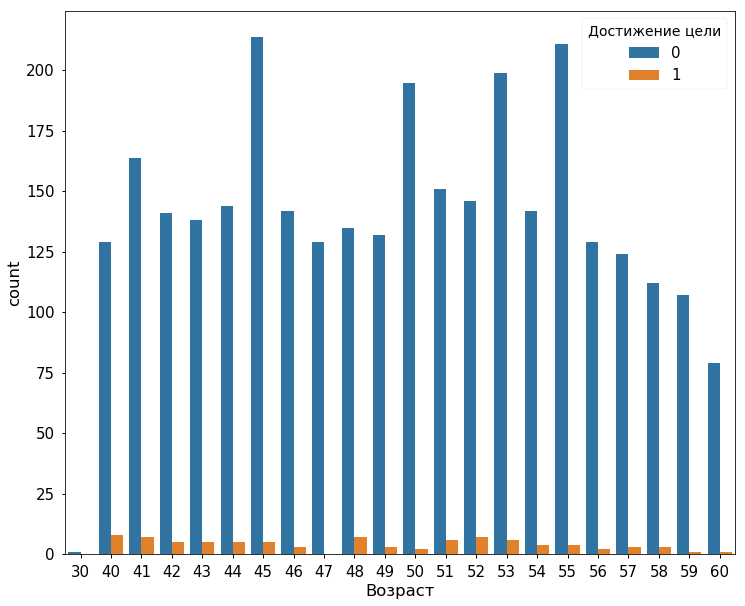

In [25]:
rcParams['figure.figsize'] = 12, 10
sns.countplot(x='Возраст', hue='Достижение цели', data=df);

### Объявление

Одним из важнейшних параметров рекламной кампании является рекламное объявление. Давайте посмотрим, как то или иное объявление влияет на целевой признак


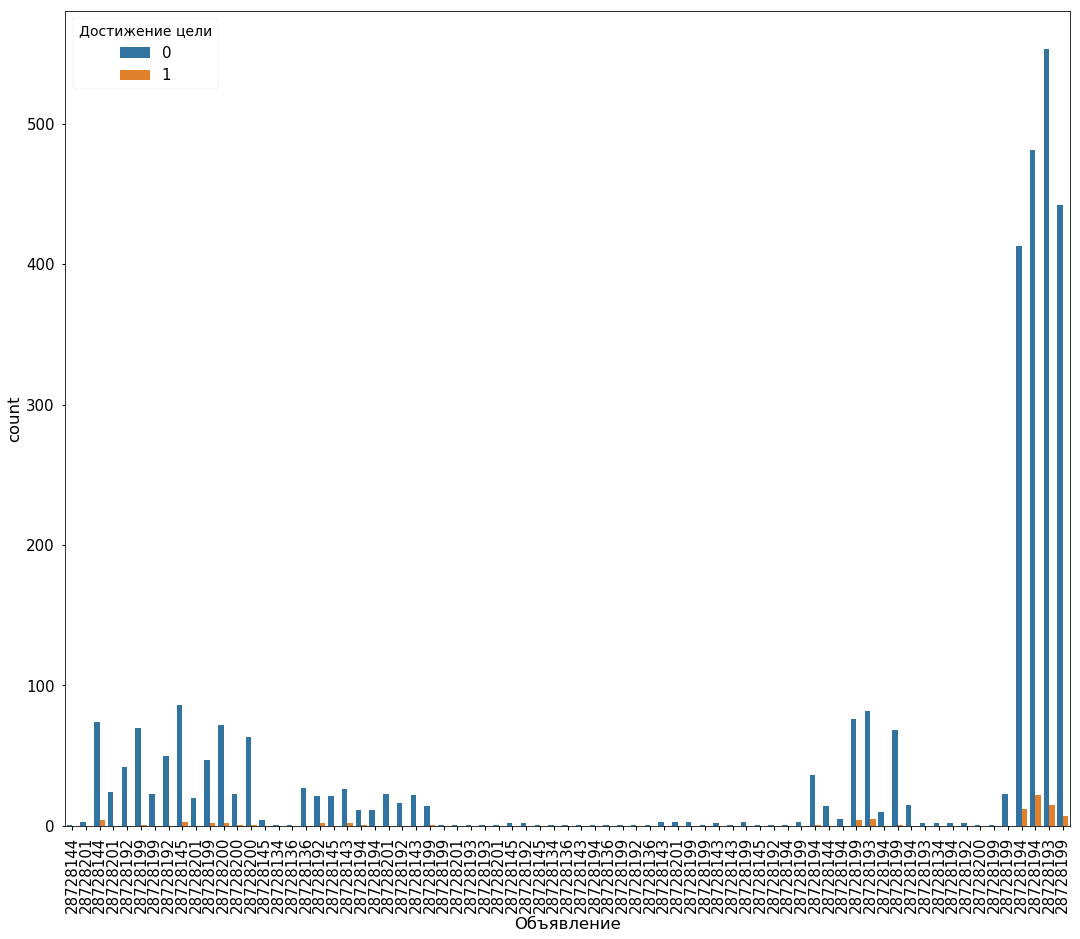

In [26]:
rcParams['figure.figsize'] = 18, 15
p = sns.countplot(x='Объявление', hue='Достижение цели', data=df);
p.set_xticklabels(labels = df['Объявление'], rotation=90);

Здесь у нас очень много "мусора". Во время тестирования кампаний было создано много объявлений, часть из них показывалась непродолжительное количество времени, потому что эти объявления имели плохие показатели кликабельности и из-за этого стоимость привлечения посетителей была неконкурентной. Их мы хорошо видим на графике. Также есть объявления, переходы с которых, при количестве до 50!, не привели к достижению ни одного целевого действия.
Давайте ради интереса расчитаем конверсию сайта относительно каждого из объявлений! И сразу отсортируем результаты по убыванию конверсии


In [27]:
ads_tab = pd.crosstab(df['Достижение цели'], df['Объявление'], margins=True)
ads_dict ={}
for ad in list(ads_tab.columns.values):
    conv = round(ads_tab[ad][1]/ads_tab[ad]['All'],4)*100
    ads_dict[conv] = ad
    
for conv in sorted(ads_dict.keys(), reverse=True):
    if(ads_dict[conv] != 'All'):
        print('{}: {}%'.format(ads_dict[conv], conv))        

29071644: 8.7%
29072096: 8.33%
29071649: 7.140000000000001%
29072170: 6.67%
29108574: 5.75%
28728134: 5.13%
29108569: 5.0%
29270212: 4.37%
28728200: 4.17%
28728194: 4.08%
28728192: 3.37%
29270203: 2.82%
29100965: 2.7%
29270215: 2.64%
29270226: 1.5599999999999998%
29108577: 1.4500000000000002%
28728143: 1.41%
29230703: 0.0%


** Сразу выделяются объвяления, переходы по которым дали конверсию почти до 9%!!! И напротив уже видно, какие объявления показывают крайне низкую эффективность **

#### Подведем итоги

Так как у нас всего один числовой признак - возраст, то строить матрицу корелляций просто не с чем. Поэтому на перечисленном выше предварительный анализ данных можно считать оконченым.

На самом деле такой первичный анализ взаимосвязи признаков и в частности зависимоти целевого признака от прочих - это базовая функциональность любой системы аналитики и ,как уже было сказано, фундаметальная задача специалиста по интернет-рекламе - как раз поиск весомых признаков с помощью систем аналитики. Мы же проделали ту же самую работу но уже с помощью Pandas

### 4. Найденные зависимости

Предварительный анализ показывает, что вцелом посетители с мобильных устройств в 1,5 раза чаще оставляют заявки на сайте! Если подробнее проанализировать операционные системы, с которых заходили пользователи и браузеры, то видно, что процент конверсии растёт еще сильнее для некоторых значений этих признаков:

** Например каждый 20й пользователь Android Browser на смартфонах с Android оставляет заявку на сайте. **

In [28]:
counts = df[(df['Мобильность'] == 1) & (df['Браузер'] == 'Android Browser')]['Достижение цели'].value_counts()
print("Конверсия сайта: {}%".format(round(counts[1]/counts[0], 3) * 100))


Конверсия сайта: 5.3%


Очень интересную картину можно получить посмотрев на возраст. Мы решили, что **неплохо будет в перспективе проверить модель на новых признаках - диапазонах возрастов**, которые мы получим во время предобработки данных

Также сразу выделяются **объвяления, переходы по которым дали конверсию почти до 9%!!!** И напротив уже видно, какие объявления показывают крайне низкую эффективность

Помимо параметров рекламной кампании удалось получить даже информацию о сайте!!!
Мы выяснили, что высокая **Отказность - сигнал о том, что нужно лучше работать над сайтом!**. При этом Показатель отказов, как признак, надо исключить. Также как анализ ОС и Браузеров показал, что по видимому **пользоваться сайтом с телефона немного удобнее, чем с десктопа.** 

### Вцелом мы получили набор некоторых признаков, которые уже можно использовать для повышения эффективности рекламной кампании

### 5. Выбор метрики

Для задач бинарной классификации существует несколько метрик качества, но не все из них нам подходят.

** Доля правильных ответов (Accuracy) ** - не подходит, потому что в случае с дисбалансом классов оказывается совершенно бесполезным показтелем

** Функция логистических потерь (LogLoss) ** - не подходит, потому что крайне сильно штрафует модель за уверенность классификатора в неверном ответе.

** Полнота (Recall), Точность (Precision), F-мера ** - подходят, потому что совершенно не зависят от соотношения классов в выборке, но требуют выбора конретного порога для отнесения объекта к тому или иному классу. 

В случае, когда хочется оценить модель без привязки на данный момент к какому-то порогу, обычно используется ** Площадь под ROC кривой (ROC-AUC) **, но эта метрика сильно зависит от соотношения классов в выборке. Если положительный класс существенно меньше по размеру, то AUC-ROC может давать неадекватную оценку качества работы алгоритма, поскольку измеряет долю неверно принятых объектов относительно общего числа отрицательных.

Избавиться от указанной проблемы с несбалансированными классами можно, перейдя от ROC-кривой к **Precision-Recall кривой**. Она определяется аналогично ROC-кривой, только по осям откладываются не FPR и TPR, а полнота (по оси абсцисс) и точность (по оси ординат)

Этой метрикой мы и будем пользоваться. Но она к сожалению не реализована в пакете sklearn. Поэтому напишем функцию для вычисления этой метрики сами:

In [285]:
def pr_auc_score (y_true, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)    
    return auc(precision, recall)

### 6. Выбор модели


Выбор модели мы будем проводить отталкиваясь от конечной цели задачи. В нашем случае нам нужно получить количественные показатели важности признаков.

Линейные модели нам не очень подойдут, потому что возникнут проблемы с интерпретируемостью коэффициентов. В самом деле, для линейных моделей признаки придется бинаризировать и в итоге мы получим коэффициенты для сотен бинарных признаков, в то время как нам нужно знать вклад каждого исходного признака.

В нашей задаче признаков немного и выборка небольшая, поэтому мы можем обратить внимание на бустинг. По опыту работы с категориальными признаками очень хорошо показала себя модель CatBoost. В нашей задаче почти все, кроме одного, признаки - категориальные. И дальше мы будем добавлять новые категориальные признаки на основе уже имеющихся.

В дополнение к уже сказанному, CatBoost позволяет получить напрямую значения важности для каждогого признака

### 7. Предобработка данных

Для начала удалим из датасета признак "Отказность", т.к. он является заведомо сильным признаком, но при этом никаким образом не является настраеваемым параметром рекламной кампании.

Также удалим Дату и время визита, т.к. без генерирование на его основе новых признаков, сам по себе этот признак не особо информативен. Позже мы, как уже было сказано, будем из него получать новые признаки.

Посмотрим на пропуски в данных. В пункте 2 мы уже обсуждали пропуски. Видно, что у нас есть два объекта, для которых не описана большая часть признаков. Полагаю, что правильнее было бы удалить эти объекты.

In [399]:
df.drop('Отказность', axis = 1, inplace = True)
df.drop('Дата и время визита', axis = 1, inplace = True)

In [431]:
df.drop('Глубина просмотра', axis = 1, inplace = True)

ValueError: labels ['Глубина просмотра'] not contained in axis

In [456]:
df= df.dropna()
df.info?

Примерно половина признаков - категориальные. Как уже было сказано заранее, мы не будем их бинаризировать, а будем использовать модель, хорошо работающую именно с категориальными признаками

Разобьем наши данные на обучающую и отложенную выборки, при этом явно укажем, что нам нужна стратификация по целевому признаку, т.к. в нашей задаче мы имеем сильный дисбаланс классов

In [433]:
#y = df['Достижение цели']
#df.drop('Достижение цели', axis = 1, inplace = True)
X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.3, stratify=y, random_state=17)

### 8. Кросс-валидация и настройка гиперпараметров модели 

Сохраним в отдельный список индексы категориальных признаков. И дополнительно вручную добавим туда второй признак "Объявление", потому что он тоже категориальный, хотя и является числом (id объявления)

In [459]:
cat_features_idx = np.where(X_train.dtypes == 'object')[0].tolist()
cat_features_idx.append(1)
skf = StratifiedKFold(n_splits=3, shuffle=True)
ctb = CatBoostClassifier(random_seed=17)

In [460]:
%%time
ctb.fit(X_train, y_train, cat_features=cat_features_idx);

0:	learn: 0.6439830	total: 59ms	remaining: 58.9s
1:	learn: 0.5992283	total: 104ms	remaining: 52s
2:	learn: 0.5582747	total: 122ms	remaining: 40.6s
3:	learn: 0.5209930	total: 142ms	remaining: 35.4s
4:	learn: 0.4866405	total: 164ms	remaining: 32.6s
5:	learn: 0.4557647	total: 197ms	remaining: 32.6s
6:	learn: 0.4273160	total: 212ms	remaining: 30s
7:	learn: 0.4016336	total: 230ms	remaining: 28.6s
8:	learn: 0.3781430	total: 245ms	remaining: 27s
9:	learn: 0.3568359	total: 251ms	remaining: 24.9s
10:	learn: 0.3374313	total: 268ms	remaining: 24.1s
11:	learn: 0.3033605	total: 297ms	remaining: 24.4s
12:	learn: 0.2724825	total: 326ms	remaining: 24.8s
13:	learn: 0.2492850	total: 353ms	remaining: 24.9s
14:	learn: 0.2260470	total: 368ms	remaining: 24.2s
15:	learn: 0.2064067	total: 401ms	remaining: 24.7s
16:	learn: 0.1929804	total: 425ms	remaining: 24.5s
17:	learn: 0.1772210	total: 455ms	remaining: 24.8s
18:	learn: 0.1649002	total: 483ms	remaining: 25s
19:	learn: 0.1551063	total: 520ms	remaining: 25.5s

166:	learn: 0.0412323	total: 5.61s	remaining: 28s
167:	learn: 0.0411743	total: 5.64s	remaining: 27.9s
168:	learn: 0.0410991	total: 5.67s	remaining: 27.9s
169:	learn: 0.0410110	total: 5.71s	remaining: 27.9s
170:	learn: 0.0409604	total: 5.74s	remaining: 27.8s
171:	learn: 0.0408756	total: 5.78s	remaining: 27.8s
172:	learn: 0.0407814	total: 5.81s	remaining: 27.8s
173:	learn: 0.0406429	total: 5.85s	remaining: 27.8s
174:	learn: 0.0405600	total: 5.89s	remaining: 27.8s
175:	learn: 0.0405097	total: 5.93s	remaining: 27.7s
176:	learn: 0.0403871	total: 5.97s	remaining: 27.8s
177:	learn: 0.0403130	total: 6s	remaining: 27.7s
178:	learn: 0.0402011	total: 6.04s	remaining: 27.7s
179:	learn: 0.0401727	total: 6.07s	remaining: 27.7s
180:	learn: 0.0401421	total: 6.1s	remaining: 27.6s
181:	learn: 0.0400625	total: 6.14s	remaining: 27.6s
182:	learn: 0.0400045	total: 6.17s	remaining: 27.6s
183:	learn: 0.0399252	total: 6.21s	remaining: 27.5s
184:	learn: 0.0397759	total: 6.24s	remaining: 27.5s
185:	learn: 0.0396

326:	learn: 0.0278159	total: 12.3s	remaining: 25.3s
327:	learn: 0.0277832	total: 12.3s	remaining: 25.3s
328:	learn: 0.0277450	total: 12.4s	remaining: 25.2s
329:	learn: 0.0276576	total: 12.4s	remaining: 25.2s
330:	learn: 0.0276058	total: 12.4s	remaining: 25.1s
331:	learn: 0.0275505	total: 12.5s	remaining: 25.1s
332:	learn: 0.0274786	total: 12.5s	remaining: 25s
333:	learn: 0.0274243	total: 12.5s	remaining: 25s
334:	learn: 0.0273300	total: 12.6s	remaining: 25s
335:	learn: 0.0272535	total: 12.6s	remaining: 24.9s
336:	learn: 0.0272380	total: 12.7s	remaining: 24.9s
337:	learn: 0.0271743	total: 12.7s	remaining: 24.9s
338:	learn: 0.0271341	total: 12.7s	remaining: 24.8s
339:	learn: 0.0270512	total: 12.8s	remaining: 24.8s
340:	learn: 0.0269892	total: 12.8s	remaining: 24.7s
341:	learn: 0.0268956	total: 12.8s	remaining: 24.7s
342:	learn: 0.0268729	total: 12.9s	remaining: 24.7s
343:	learn: 0.0267436	total: 12.9s	remaining: 24.6s
344:	learn: 0.0266546	total: 12.9s	remaining: 24.6s
345:	learn: 0.0265

488:	learn: 0.0198933	total: 18.2s	remaining: 19s
489:	learn: 0.0198370	total: 18.2s	remaining: 19s
490:	learn: 0.0198024	total: 18.2s	remaining: 18.9s
491:	learn: 0.0197820	total: 18.3s	remaining: 18.9s
492:	learn: 0.0197383	total: 18.3s	remaining: 18.8s
493:	learn: 0.0197082	total: 18.4s	remaining: 18.8s
494:	learn: 0.0196434	total: 18.4s	remaining: 18.8s
495:	learn: 0.0196320	total: 18.4s	remaining: 18.7s
496:	learn: 0.0195868	total: 18.5s	remaining: 18.7s
497:	learn: 0.0195693	total: 18.5s	remaining: 18.7s
498:	learn: 0.0195213	total: 18.5s	remaining: 18.6s
499:	learn: 0.0194927	total: 18.6s	remaining: 18.6s
500:	learn: 0.0194795	total: 18.6s	remaining: 18.6s
501:	learn: 0.0194408	total: 18.7s	remaining: 18.5s
502:	learn: 0.0194122	total: 18.7s	remaining: 18.5s
503:	learn: 0.0193853	total: 18.8s	remaining: 18.5s
504:	learn: 0.0193690	total: 18.8s	remaining: 18.4s
505:	learn: 0.0193258	total: 18.8s	remaining: 18.4s
506:	learn: 0.0193088	total: 18.9s	remaining: 18.3s
507:	learn: 0.01

647:	learn: 0.0149931	total: 24.1s	remaining: 13.1s
648:	learn: 0.0149658	total: 24.1s	remaining: 13.1s
649:	learn: 0.0149423	total: 24.2s	remaining: 13s
650:	learn: 0.0149134	total: 24.2s	remaining: 13s
651:	learn: 0.0148831	total: 24.2s	remaining: 12.9s
652:	learn: 0.0148687	total: 24.3s	remaining: 12.9s
653:	learn: 0.0148150	total: 24.3s	remaining: 12.9s
654:	learn: 0.0147731	total: 24.3s	remaining: 12.8s
655:	learn: 0.0147592	total: 24.4s	remaining: 12.8s
656:	learn: 0.0147250	total: 24.4s	remaining: 12.7s
657:	learn: 0.0146929	total: 24.4s	remaining: 12.7s
658:	learn: 0.0146843	total: 24.5s	remaining: 12.7s
659:	learn: 0.0146756	total: 24.5s	remaining: 12.6s
660:	learn: 0.0146655	total: 24.6s	remaining: 12.6s
661:	learn: 0.0146076	total: 24.6s	remaining: 12.6s
662:	learn: 0.0145749	total: 24.6s	remaining: 12.5s
663:	learn: 0.0145534	total: 24.7s	remaining: 12.5s
664:	learn: 0.0144984	total: 24.7s	remaining: 12.4s
665:	learn: 0.0144780	total: 24.7s	remaining: 12.4s
666:	learn: 0.01

810:	learn: 0.0116829	total: 30.1s	remaining: 7.02s
811:	learn: 0.0116646	total: 30.2s	remaining: 6.99s
812:	learn: 0.0116554	total: 30.2s	remaining: 6.95s
813:	learn: 0.0116252	total: 30.2s	remaining: 6.91s
814:	learn: 0.0116008	total: 30.3s	remaining: 6.87s
815:	learn: 0.0115560	total: 30.3s	remaining: 6.84s
816:	learn: 0.0115445	total: 30.4s	remaining: 6.8s
817:	learn: 0.0115218	total: 30.4s	remaining: 6.76s
818:	learn: 0.0115032	total: 30.4s	remaining: 6.72s
819:	learn: 0.0114802	total: 30.5s	remaining: 6.68s
820:	learn: 0.0114595	total: 30.5s	remaining: 6.65s
821:	learn: 0.0114450	total: 30.5s	remaining: 6.61s
822:	learn: 0.0114404	total: 30.6s	remaining: 6.57s
823:	learn: 0.0114314	total: 30.6s	remaining: 6.53s
824:	learn: 0.0113885	total: 30.6s	remaining: 6.5s
825:	learn: 0.0113840	total: 30.7s	remaining: 6.46s
826:	learn: 0.0113739	total: 30.7s	remaining: 6.42s
827:	learn: 0.0113492	total: 30.7s	remaining: 6.38s
828:	learn: 0.0113414	total: 30.8s	remaining: 6.34s
829:	learn: 0.

969:	learn: 0.0092478	total: 35.7s	remaining: 1.1s
970:	learn: 0.0092340	total: 35.8s	remaining: 1.07s
971:	learn: 0.0092216	total: 35.8s	remaining: 1.03s
972:	learn: 0.0092165	total: 35.8s	remaining: 994ms
973:	learn: 0.0092103	total: 35.9s	remaining: 957ms
974:	learn: 0.0092000	total: 35.9s	remaining: 920ms
975:	learn: 0.0091894	total: 35.9s	remaining: 883ms
976:	learn: 0.0091548	total: 36s	remaining: 846ms
977:	learn: 0.0091462	total: 36s	remaining: 810ms
978:	learn: 0.0091359	total: 36s	remaining: 773ms
979:	learn: 0.0091263	total: 36.1s	remaining: 736ms
980:	learn: 0.0091188	total: 36.1s	remaining: 699ms
981:	learn: 0.0091137	total: 36.1s	remaining: 662ms
982:	learn: 0.0091070	total: 36.2s	remaining: 626ms
983:	learn: 0.0091041	total: 36.2s	remaining: 589ms
984:	learn: 0.0090986	total: 36.2s	remaining: 552ms
985:	learn: 0.0090910	total: 36.3s	remaining: 515ms
986:	learn: 0.0090877	total: 36.3s	remaining: 478ms
987:	learn: 0.0090796	total: 36.3s	remaining: 441ms
988:	learn: 0.00906

In [461]:
pr_auc_score(y_valid, ctb.predict(X_valid))

0.08827838827838827

In [462]:
print('Precision: {0:.2f}'.format(precision_score(y_valid, ctb.predict(X_valid))))
print('Recall: {0:.2f}'.format(recall_score(y_valid, ctb.predict(X_valid))))
print('F1: {0:.2f}'.format(f1_score(y_valid, ctb.predict(X_valid))))

Precision: 0.17
Recall: 0.04
F1: 0.06


In [467]:
from sklearn.preprocessing import LabelEncoder

In [466]:
df.head()

,Возраст,Объявление,Сегмент,Визиты,Поддержка сookies,Поддержка Java,Поддержка JavaScript,Поддержка Flash,Поддержка Silverlight,Мобильность,Блокировка рекламы,Время на сайте,Является ли визит первым визитом посетителя,Визитов в истории,Дней от первого визита,Тип устройства,Группа операционных систем,Операционная система (детально),Браузер
0,48,28728144,90x75_cpc_remont_F45-50,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,30 – 59 секунд,Вернувшиеся посетители,4-7,2‑3 дня,ПК,Windows,Windows 10,Opera
1,57,28728201,90x75_cpc_remont_F55-60,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0 секунд (отказ),Новые посетители,1,0 дней,ПК,Windows,Windows 7 или 2008 Server,Firefox
2,48,28728144,90x75_cpc_remont_F45-50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10 – 29 секунд,Вернувшиеся посетители,8-15,2‑3 дня,ПК,Windows,Windows 10,Opera
3,59,28728201,90x75_cpc_remont_F55-60,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0 секунд (отказ),Вернувшиеся посетители,2-3,2‑3 дня,ПК,Windows,Windows 8.1,Firefox
4,50,28728192,90x75_cpc_remont_F50-55,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0 секунд (отказ),Новые посетители,1,0 дней,ПК,Windows,Windows XP,Firefox


In [469]:
encoder = LabelEncoder()
encoder.fit_transform(X_train)

ValueError: bad input shape (2204, 19)

In [463]:
from imblearn.combine import SMOTEENN

In [465]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(X_train, y_train)


ValueError: could not convert string to float: 'Яндекс.Браузер'

- надо новых фич нагенерить чтобы повысить качество
- оверсемплинг сделать

In [ ]:
importance_df = pd.DataFrame({
        'Splits': list(ctb.feature_importances_),
        'Feature': list(importances.keys())
    })
importance_df.sort_values(by='Splits', inplace=True)
importance_df.plot(kind='barh', x='Feature', figsize=(8,6), color='orange');

Также нужно отмасштабировать признаки, т.к. в противном случае признак возраст, например, будет иметь заведомо больший вес

In [156]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

https://github.com/blue-yonder/tsfresh